## ML Lab 3
### Neural Networks

In the following exercise class we explore how to design and train neural networks in various ways.

#### Prerequisites:

In order to follow the exercises you need to:
1. Activate your conda environment from last week via: `source activate <env-name>` 
2. Install tensorflow (https://www.tensorflow.org) via: `pip install tensorflow` (CPU-only)
3. Install keras (provides high level wrapper for tensorflow) (https://keras.io) via: `pip install keras`

## Exercise 1: Create a 2 layer network that acts as an XOR gate using numpy.

XOR is a fundamental logic gate that outputs a one whenever there is an odd parity of ones in its input and zero otherwise. For two inputs this can be thought of as an exclusive or operation and the associated boolean function is fully characterized by the following truth table.

| X | Y | XOR(X,Y) |
|---|---|----------|
| 0 | 0 |    0     |
| 0 | 1 |    1     |
| 1 | 0 |    1     |
| 1 | 1 |    0     |

The function of an XOR gate can also be understood as a classification problem on $v \in \{0,1\}^2$ and we can think about designing a classifier acting as an XOR gate. It turns out that this problem is not solvable by any single layer perceptron (https://en.wikipedia.org/wiki/Perceptron) because the set of points $\{(0,0), (0,1), (1,0), (1,1)\}$ is not linearly seperable.

**Design a two layer perceptron using basic numpy matrix operations that implements an XOR Gate on two inputs. Think about the flow of information and accordingly set the weight values by hand.**

### Data

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def generate_xor_data():
    X = [(i,j) for i in [0,1] for j in [0,1]]
    y = [int(np.logical_xor(x[0], x[1])) for x in X]
    return X, y
    
X, y = generate_xor_data()

In [2]:
print(X)
print(y)

[(0, 0), (0, 1), (1, 0), (1, 1)]
[0, 1, 1, 0]


### Hints
A single layer in a multilayer perceptron can be described by the equation $y = f(\vec{b} + W\vec{x})$ with $f$ the logistic function, a smooth and differentiable version of the step function, and defined as $f(z) = \frac{1}{1+e^{-z}}$. $\vec{b}$ is the so called bias, a constant offset vector and $W$ is the weight matrix. However, since we set the weights by hand feel free to use hard thresholding instead of using the logistic function. Write down the equation for a two layer MLP and implement it with numpy. For documentation see https://docs.scipy.org/doc/numpy-1.13.0/reference/ 

| X | Y | AND(NOT X, Y) | AND(X,NOT Y) | OR[AND(NOT X, Y), AND(X, NOT Y)]| XOR(X,Y) |
|---|---|---------------|--------------|---------------------------------|----------|
| 0 | 0 |    0          |      0       |                 0               |    0     |
| 0 | 1 |    1          |      0       |                 1               |    1     |
| 1 | 0 |    0          |      1       |                 1               |    1     |
| 1 | 1 |    0          |      0       |                 0               |    0     |

Implement XOR as a combination of 2 AND Gates and 1 OR gate where each neuron in the network acts as one of these gates.

In [11]:
def logistic_func(z):
    return 1/(1+np.exp(-z))

<IPython.core.display.Javascript object>


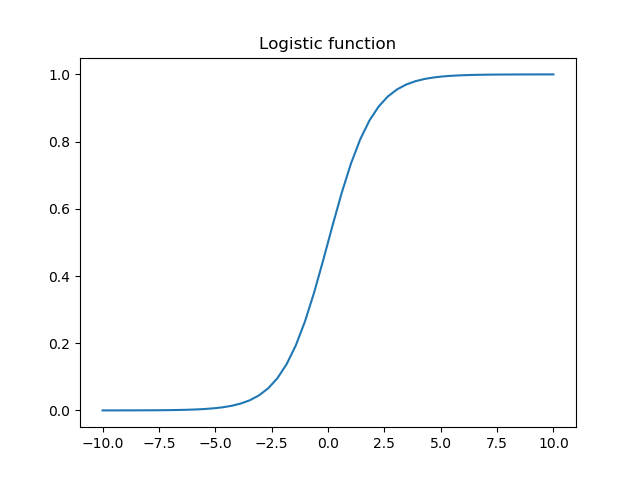

Text(0.5,1,'Logistic function')

In [15]:
x = np.linspace(-10,10)
y = logistic_func(x)

plt.figure()
plt.plot(x,y)
plt.title('Logistic function')

In [27]:
y_

0.0001544462123729689

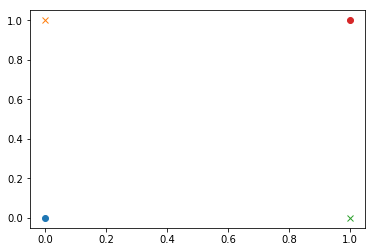

In [29]:
plt.figure()

for x_, y_ in zip(X,y):

    if y_ == 1:
        plt.plot(x_[0],x_[1],'x')
    elif y_ == 0:
        plt.plot(x_[0],x_[1],'o')

In [145]:
"""
Implement your solution here.
"""

w1 = np.tranpose([0 0])
b1 = np.tranpose([0 0])



'\nImplement your solution here.\n'

## Exercise 2: Use Keras to design, train and evaluate a neural network that can classify points on a 2D plane.

This is what you would do day-to-day if you're in this line of research...

### Data generator

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(n_points, noise=1.0):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

### Training data

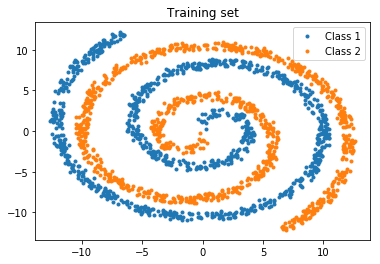

In [31]:
X_train, y_train = generate_spiral_data(1000)

plt.title('Training set')
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], '.', label='Class 1')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], '.', label='Class 2')
plt.legend()
plt.show()

### Test data

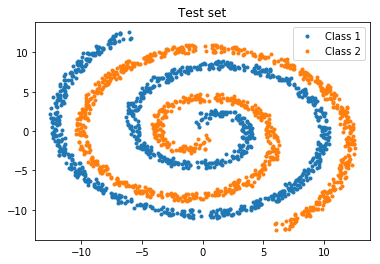

In [35]:
X_test, y_test = generate_spiral_data(1000)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.', label='Class 1')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.', label='Class 2')
plt.legend()
plt.show()

### 2.1. Design and train your model
The current model performs badly, try to find a more advanced architecture that is able to solve the classification problem. Read the following code snippet and understand the involved functions. Vary width and depth of the network and play around with activation functions, loss functions and optimizers to achieve a better result. Read up on parameters and functions for sequential models at https://keras.io/getting-started/sequential-model-guide/.

In [36]:
from keras.models import Sequential
from keras.layers import Dense

"""
Replace the following model with yours and try to achieve better classification performance
"""
bad_model = Sequential()
bad_model.add(Dense(12, input_dim=2, activation='tanh')) # specify input dim
bad_model.add(Dense(1, activation='sigmoid'))  # don't need to specify, can infer from earlier layers

bad_model.compile(loss='mean_squared_error',
                  optimizer='SGD', # SGD = Stochastic Gradient Descent
                  metrics=['accuracy'])

# Train the model
bad_model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

### Predict

In [37]:
bad_prediction = np.round(bad_model.predict(X_test).T[0])

### Visualize

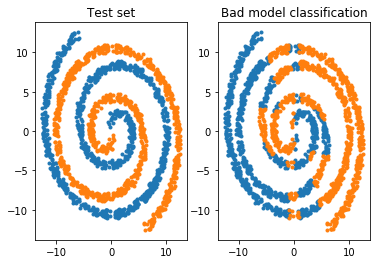

In [38]:
plt.subplot(1,2,1)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
plt.subplot(1,2,2)

plt.title('Bad model classification')
plt.plot(X_test[bad_prediction==0,0], X_test[bad_prediction==0,1], '.')
plt.plot(X_test[bad_prediction==1,0], X_test[bad_prediction==1,1], '.')
plt.show()

In [41]:
"""
Implement your solution here.

There's no one-sized-fit-all principled way to go about parameterizing
your model. There are some hints, though.

Possible things to play with:
- number of hidden layers (most effective, first thing to try)
- stack more layers
- activation function
- loss function
- optimiser: {'adam','rmsprop'}

_Notes_
- rmsprop: more realistic
- binary_crossentropy: something about maximum entropy
- relu might not be a good activation function because of the curved edges
"""

model1 = Sequential()
model1.add(Dense(12, input_dim=2, activation='tanh'))
model1.add(Dense(1, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='mean_squared_error',
               optimizer='SGD', # SGD = Stochastic Gradient Descent
               metrics=['accuracy'])

# Train the model
model1.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

### 2.2. Visualize the decision boundary of your model.

###  Predict

In [42]:
model1_prediction = np.round(model1.predict(X_test).T[0])

### Visualize

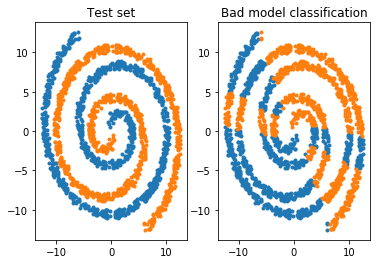

In [43]:
plt.subplot(1,2,1)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
plt.subplot(1,2,2)

plt.title('Bad model classification')
plt.plot(X_test[model1_prediction==0,0], X_test[model1_prediction==0,1], '.')
plt.plot(X_test[model1_prediction==1,0], X_test[model1_prediction==1,1], '.')
plt.show()

#### Performance

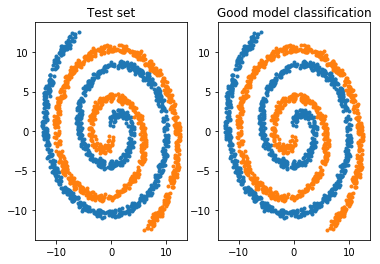

In [163]:
def plot_good_spiral_prediction(X_test, y_test, good_prediction):
    plt.subplot(1,2,1)
    plt.title('Test set')
    plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
    plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
    plt.subplot(1,2,2)
    plt.title('Good model classification')
    plt.plot(X_test[good_prediction==0,0], X_test[good_prediction==0,1], '.')
    plt.plot(X_test[good_prediction==1,0], X_test[good_prediction==1,1], '.')
    plt.show()

# Call the function above to generate the plot below

#### Decision boundary

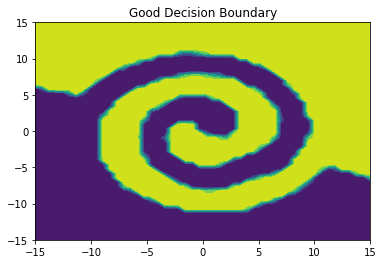

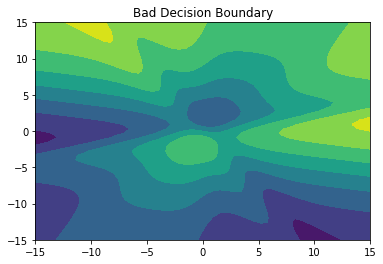

In [164]:
def plot_decision_boundaries(good_model, bad_model):
    # Generate grid:
    line = np.linspace(-15,15)
    xx, yy = np.meshgrid(line,line)
    grid = np.stack((xx,yy))

    # Reshape to fit model input size:
    grid = grid.T.reshape(-1,2)

    # Predict:
    good_prediction = good_model.predict(grid)
    bad_prediction = bad_model.predict(grid)

    # Reshape to grid for visualization:
    plt.title("Good Decision Boundary")
    good_prediction = good_prediction.T[0].reshape(len(line),len(line))
    plt.contourf(xx,yy,good_prediction)
    plt.show()

    plt.title("Bad Decision Boundary")
    bad_prediction = bad_prediction.T[0].reshape(len(line),len(line))
    plt.contourf(xx,yy,bad_prediction)
    plt.show()

# Call the function above to generate the plot below

## Design, train and test a neural network that is able to classify MNIST digits using Keras.

Lesson: Changing the structure of the neural network is going to allow you to work with more complex data.

### Data

**Kernel sizes**
- 3x3 seem to work well for handwriting and natural images regardless of image size
- for images with objects of different sizes, you might choose to use kernels of different sizes (e.g. 3x3, 5x5)

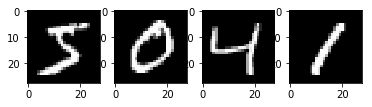

In [67]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

"""
Returns:
2 tuples:

x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).
"""

# Show example data
plt.subplot(1,4,1)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,2)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,3)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,4)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [74]:
y_train.shape

(60000, 10)

In [72]:
def plot_mnist_predictions(cnn_model, x_test):
    y_predict = cnn_model.predict(x_test, verbose=0)
    y_predict_digits = [np.argmax(y_predict[i]) for i in range(y_predict.shape[0])]
    plt.subplot(1,4,1)
    plt.imshow(x_test[0,:,:,0], cmap=plt.get_cmap('gray'))
    plt.subplot(1,4,2)
    plt.imshow(x_test[1,:,:,0], cmap=plt.get_cmap('gray'))
    plt.subplot(1,4,3)
    plt.imshow(x_test[2,:,:,0], cmap=plt.get_cmap('gray'))
    plt.subplot(1,4,4)
    plt.imshow(x_test[3,:,:,0], cmap=plt.get_cmap('gray'))
    plt.show()

    print("CNN predictions: {0}, {1}, {2}, {3}".format(y_predict_digits[0],
                                                       y_predict_digits[1],
                                                       y_predict_digits[2],
                                                       y_predict_digits[3]))

In [73]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

"""
We need to add a channel dimension
to the image input.

- maxpooling: if you have a higher dimension that you want to look at, and
  ignore the rest
- softmax of 10 because you want to classify them into 10 different possible
  outputs
"""
x_train = x_train.reshape(x_train.shape[0],
                          x_train.shape[1],
                          x_train.shape[2],
                          1)
x_test = x_test.reshape(x_test.shape[0],
                        x_test.shape[1],
                        x_test.shape[2],
                        1)
"""
Train the image using 32-bit floats normalized
between 0 and 1 for numerical stability.
"""
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
input_shape = (x_train.shape[1], x_train.shape[2], 1)

"""
Output should be a 10 dimensional one-hot vector,
not just an integer denoting the digit.
This is due to our use of softmax to "squish" network
output for classification.
"""
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

"""
Implement your solution here.
"""

digit_model = Sequential()
digit_model.add(Dense(12, input_dim=2, activation='tanh'))
digit_model.add(Dense(1, activation='sigmoid'))

digit_model.compile(loss='categorical_crossentropy',
               optimizer='adagrad', # SGD = Stochastic Gradient Descent
               metrics=['accuracy'])

# Train the model
digit_model.fit(x_train, y_train, epochs=10, batch_size=128,  verbose=1, validation_data=(x_test, y_test))

# Call plot_mnist_predictions to generate the plot below
plot_mnist_predictions(digit_model, x_test)

ValueError: Error when checking input: expected dense_12_input to have 2 dimensions, but got array with shape (60000, 28, 28, 1)